In [ ]:
import numpy as np
from scipy import random
from scipy.stats import multivariate_normal

class em():
    def __init__(self, k, dim, i_mean=None, i_sigma=None, i_pi=None):
        self.k = k
        self.dim = dim
        if(i_mean is None):
            i_mean = random.rand(k, dim)*50 - 25
        self.mean = i_mean
        if(i_sigma is None):
            i_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                i_sigma[i] = np.eye(dim)
        self.sigma = i_sigma
        if(i_pi is None):
            i_pi = np.ones(self.k)/self.k
        self.pi = i_pi
    
    def i_em(self, X):
        self.ds = X
        self.n = X.shape[0]
        self.z = np.zeros((self.n, self.k))
    
    def e_step(self):
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.ds, mean=self.mean[i], cov=self.sigma[i])
        self.z /= self.z.sum(axis=1, keepdims=True)
    
    def m_step(self):
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.n
        self.mean = np.matmul(self.z.T, self.ds)
        self.mean /= sum_z[:,None]
        for i in range(self.k):
            j = np.expand_dims(self.ds, axis=1) - self.mean[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.sigma[i] /= sum_z[i]
        print("Mean: ")
        print(self.mean)
        print("\nCovariance: ")
        print(self.sigma)
        print("\nMixing Coeff.: ")
        print(self.pi)
            
    def llh(self, X):
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                tot += self.pi[i] * multivariate_normal.pdf(d, mean=self.mean[i], cov=self.sigma[i])
            ll.append(np.log(tot))
        return np.sum(ll)

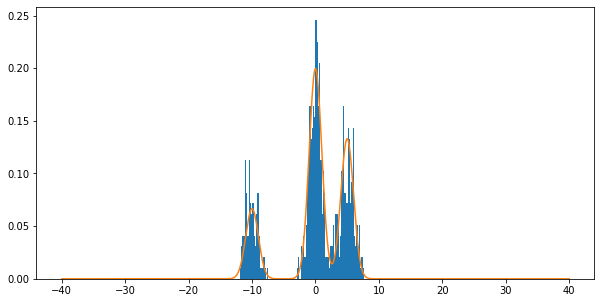

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# stored as array the values of mean and SDs and mixing coefficients
# N1[2/3,-1,1] N2[1/6,0,1], N3[1/6,1,1]
mu = [-10, 0, 5]
sigma = [1, 1, 1]
p_i = [1/6, 1/2, 1/3]
n = 500

# empty array
x = []
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    x_i = np.random.normal(mu[z_i], sigma[z_i])
    x.append(x_i)

X = np.array(x)
X = np.reshape(X,(n,-1))
def univariate_normal(x, mean, variance):
    return ((1. / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance)))

a = np.arange(-40, 40, 0.01)
y = p_i[0] * univariate_normal(a, mean=mu[0], variance=sigma[0]**2) + p_i[1] * univariate_normal(a, mean=mu[1], variance=sigma[0]**2)+ p_i[2] * univariate_normal(a, mean=mu[2], variance=sigma[0]**2)

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(x, bins=100, density=True)
ax.plot(a, y)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=2).fit(X)
i_mean = kmeans.cluster_centers_
print(i_mean)
gmm = em(3, 1, i_mean)

[[  4.94784676]
 [-10.12506474]
 [ -0.0295556 ]]


In [ ]:
gmm.i_em(X)
n_iter = 30
# Saving log-likelihood
log_likelihood = [gmm.llh(X)]
for e in range(n_iter):
    # E-step
    gmm.e_step()
    print("Iteration: {}".format(e+1))
    # M-step
    gmm.m_step()
    # Computing log-likelihood
    log_likelihood.append(gmm.llh(X))
    print("\nlog-likelihood: {:.8f}".format(log_likelihood[-1]))
    print("\n")

Iteration: 1
Mean: 
[[-1.02371602]
 [ 0.22798825]
 [ 1.39000491]]

Covariance: 
[[[0.87365745]]

 [[0.68883579]]

 [[0.85644776]]]

Mixing Coeff.: 
[0.28622877 0.41755358 0.29621766]

log-likelihood: -833.42848125


Iteration: 2
Mean: 
[[-1.02229247]
 [ 0.23352395]
 [ 1.38003879]]

Covariance: 
[[[0.92509303]]

 [[0.65530368]]

 [[0.91569282]]]

Mixing Coeff.: 
[0.28321771 0.42365932 0.29312297]

log-likelihood: -832.72085782


Iteration: 3
Mean: 
[[-1.02232512]
 [ 0.23899502]
 [ 1.37379927]]

Covariance: 
[[[0.94807897]]

 [[0.63891682]]

 [[0.95068269]]]

Mixing Coeff.: 
[0.28185934 0.42695019 0.29119047]

log-likelihood: -832.52423176


Iteration: 4
Mean: 
[[-1.02320806]
 [ 0.24453521]
 [ 1.36919802]]

Covariance: 
[[[0.95747732]]

 [[0.63080706]]

 [[0.97236551]]]

Mixing Coeff.: 
[0.28132825 0.42877054 0.28990121]

log-likelihood: -832.45694163


Iteration: 5
Mean: 
[[-1.02445925]
 [ 0.24997083]
 [ 1.36548629]]

Covariance: 
[[[0.96022877]]

 [[0.62678895]]

 [[0.98683707]]]

Mixi

In [ ]:
import numpy as np
a = [[1,2,3],[4,5,6],[7,8,9]]
k = [1,2,3]
a = np.array(a)
a = a/k
b = a.sum(axis=1)
print(b)
print(a)

[ 3.   8.5 14. ]
[[1.  1.  1. ]
 [4.  2.5 2. ]
 [7.  4.  3. ]]
